# **Credit Card Customer Segmentation**

Objective: To segment the credit card customers into distinct categories based on the featureset.


In [1]:
!pip install kneed

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set_style("whitegrid")

import copy
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

In [3]:
df = pd.read_csv("/content/BankChurners.csv")
df.head(5)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [5]:
# Make a copy of the original dataframe
new_df = copy.deepcopy(df)
new_df.head(3)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   

[3 rows x 23 columns]

# **Data Cleaning**
- Removing duplicates
- Imputing missing/unknown values

In [6]:
# Checking for rows with null values
rows_with_null = df.isnull().any(axis=1)

# Filtering the DataFrame to include only rows with null values
rows_with_null_df = df[rows_with_null]

print(rows_with_null_df)

Empty DataFrame
Columns: [CLIENTNUM, Attrition_Flag, Customer_Age, Gender, Dependent_count, Education_Level, Marital_Status, Income_Category, Card_Category, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio, Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1, Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2]
Index: []

[0 rows x 23 columns]


In [7]:
# Dropping rows that have the 'Unknown' value

new_df = new_df[new_df!='Unknown'].dropna()
print(f"Number of rows deleted: {len(df)-len(new_df)}")
print(f"The total number of data points after removing 'Unknown' values are: {len(new_df)}")

Number of rows deleted: 3046
The total number of data points after removing 'Unknown' values are: 7081


In [8]:
# Drop unnecessary columns
cols_to_drop = ['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
new_df.drop(cols_to_drop, inplace=True, axis=1)

# **Exploratory Data Analysis**

- Individual feature distribution
- Pair plots to see feature relationships






In [9]:
numerical_cols = ['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

categorical_cols = ['Attrition_Flag','Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

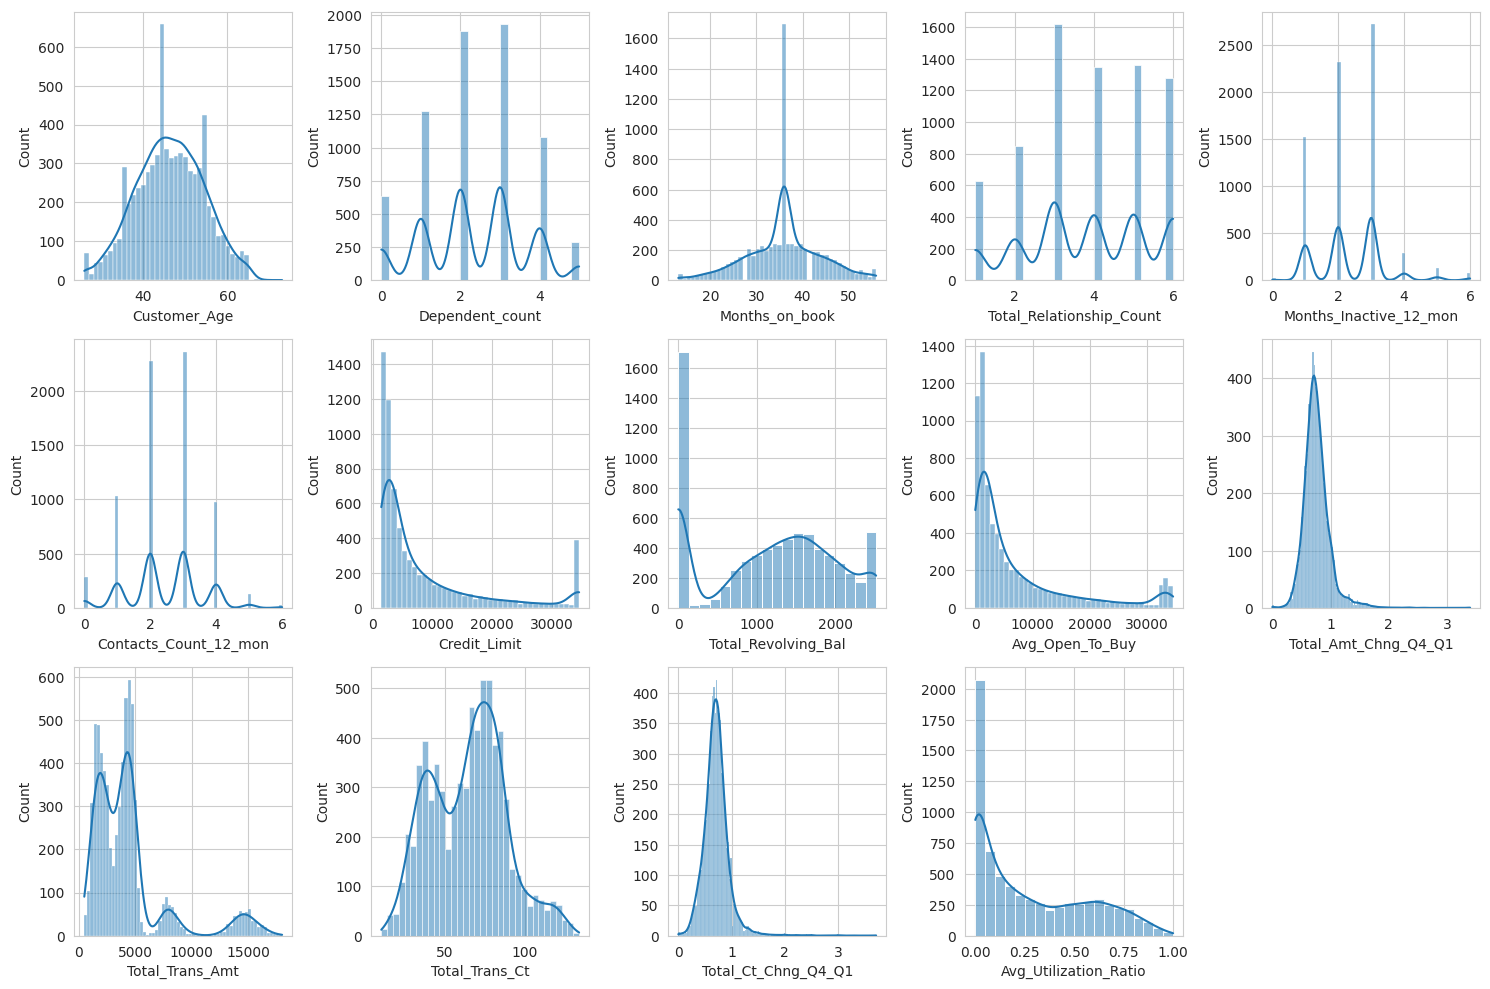

In [10]:
# Creating histogram plots to view frequency distribution for each individual numerical column

plt.figure(figsize = (15,10))
for i,col in enumerate(numerical_cols,1):
  plt.subplot(3,5,i)
  sns.histplot(new_df[col], kde=True)

plt.tight_layout()
plt.show()

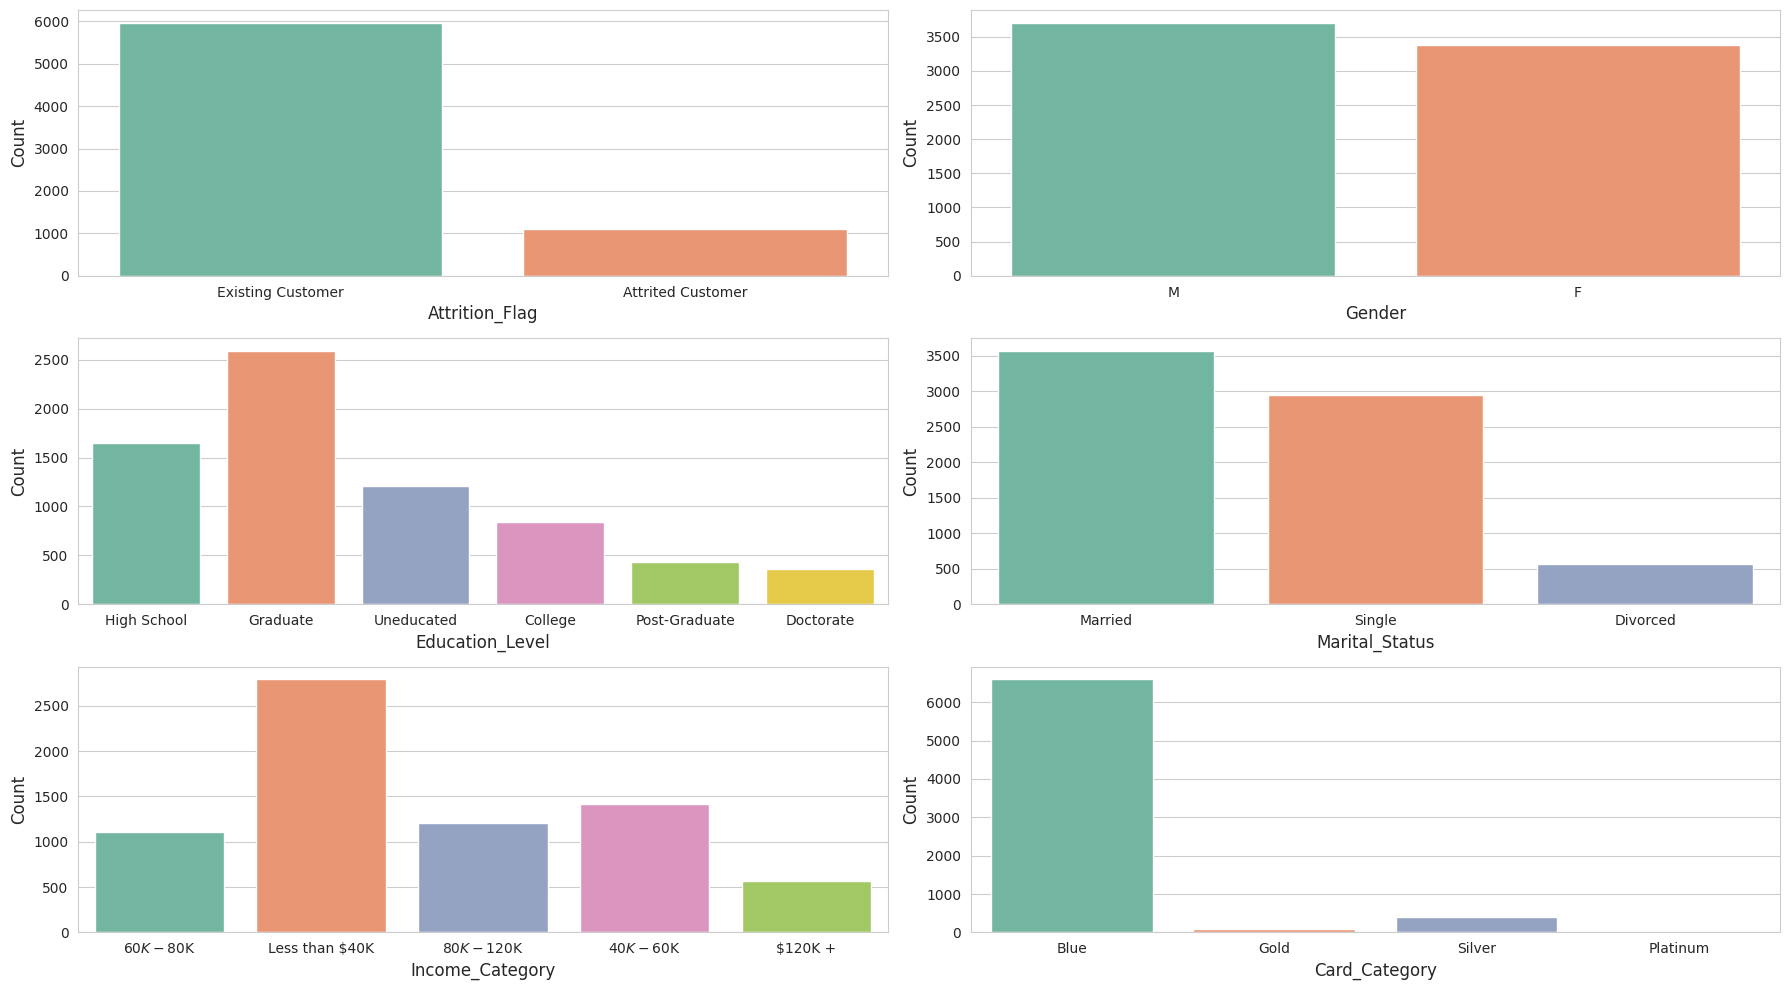

In [11]:
# Creating Count plots for each categorical feature

plt.figure(figsize=(18,10))
for i,col in enumerate(categorical_cols,1):
  plt.subplot(3,2,i)
  sns.countplot(data=new_df, x=col, hue=col, palette='Set2')
  plt.xlabel(col, fontsize=12)
  plt.ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

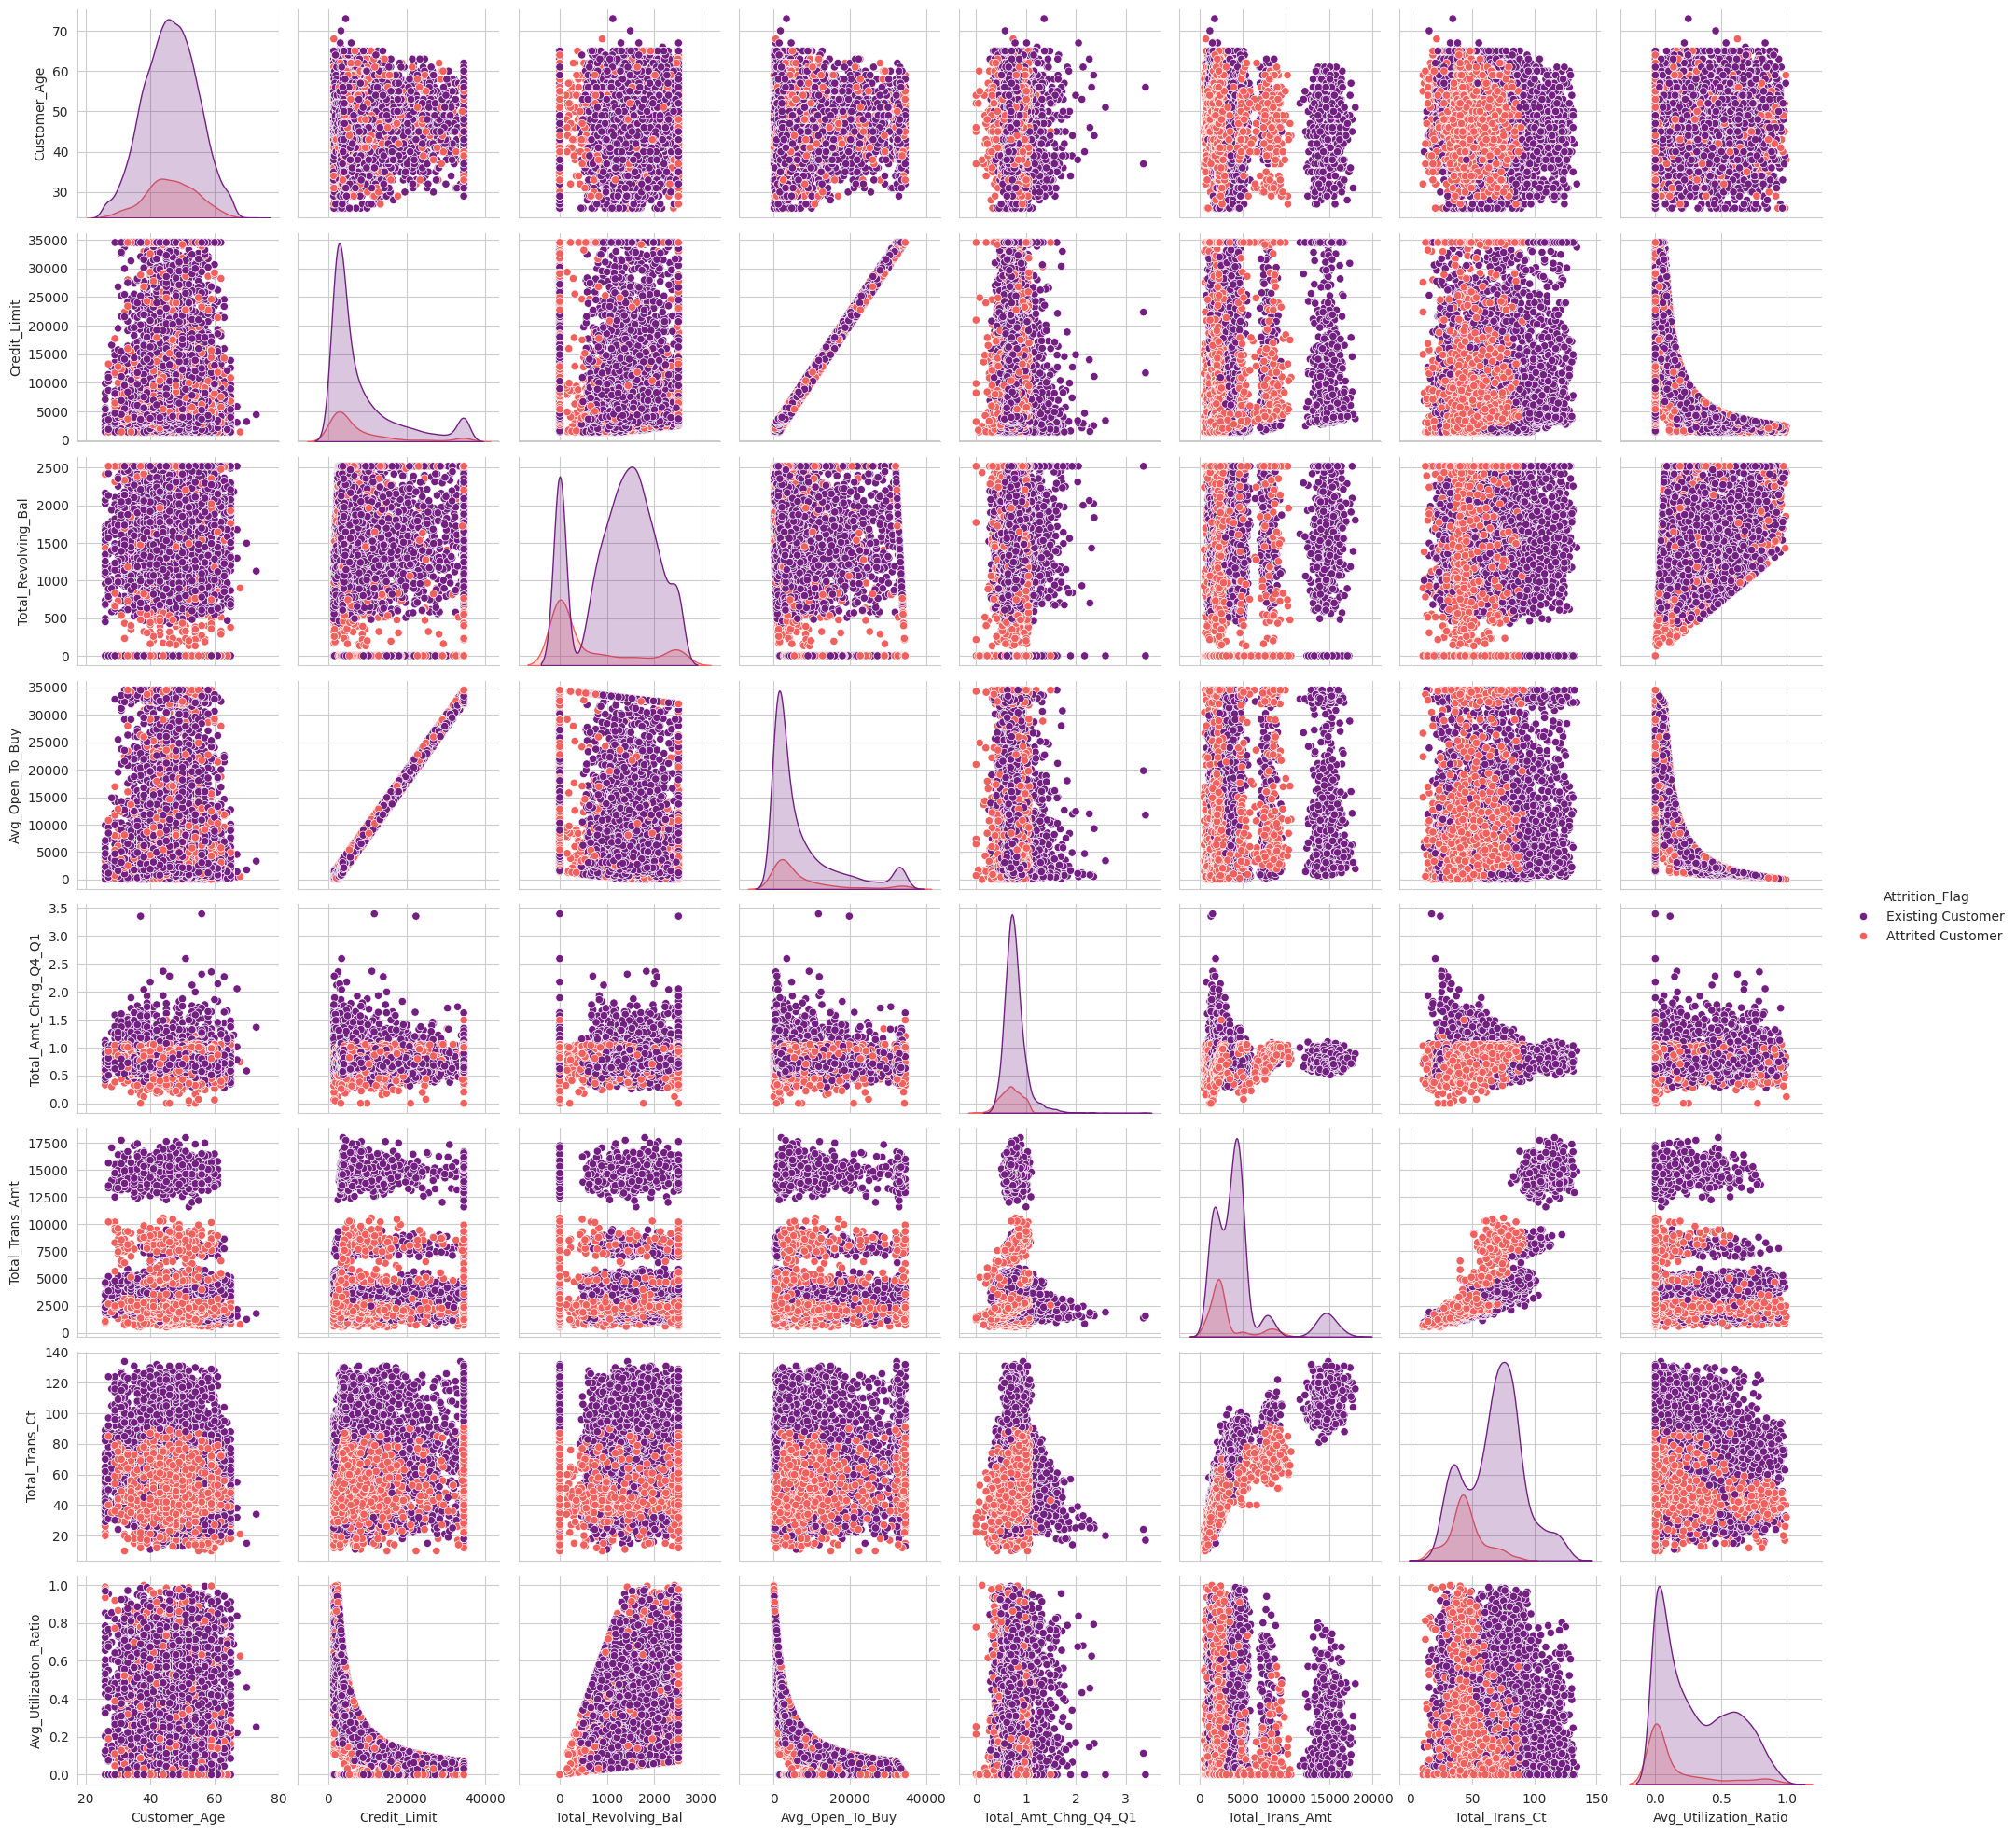

In [12]:
# Pairwise analysis of select/few numerical features
plt.figure()
sns.pairplot(new_df,
             vars = ['Customer_Age',
                     'Credit_Limit', 'Total_Revolving_Bal',
                     'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
                     'Total_Trans_Amt', 'Total_Trans_Ct',
                      'Avg_Utilization_Ratio'],
             hue='Attrition_Flag',
             palette='magma')
plt.show()

# **Data Preprocessing**

- Feature encoding
- Feature standardization/scaling
- Feature correlation using heatmap

In [13]:
# Feature encoding
nominal_features = ['Gender', 'Marital_Status']
ordinal_features = ['Attrition_Flag','Education_Level', 'Income_Category', 'Card_Category']

#One-hot encode for nominal features
one_hot_encoded_df = pd.get_dummies(new_df, columns=nominal_features,  dtype=int)

#Label encoding for ordinal features
label_encoder = LabelEncoder()
label_encoded_features = one_hot_encoded_df[ordinal_features].apply(label_encoder.fit_transform)

df_encoded = pd.concat([one_hot_encoded_df.drop(ordinal_features, axis=1),
                          label_encoded_features], axis=1)

In [14]:
df_encoded.describe().T

count         mean          std     min       25%  \
Customer_Age              7081.0    46.347691     8.041225    26.0    41.000   
Dependent_count           7081.0     2.337805     1.291649     0.0     1.000   
Months_on_book            7081.0    35.981359     8.002609    13.0    31.000   
Total_Relationship_Count  7081.0     3.819376     1.544444     1.0     3.000   
Months_Inactive_12_mon    7081.0     2.342607     0.995104     0.0     2.000   
Contacts_Count_12_mon     7081.0     2.454456     1.104917     0.0     2.000   
Credit_Limit              7081.0  8492.773831  9126.072520  1438.3  2498.000   
Total_Revolving_Bal       7081.0  1167.501624   812.315606     0.0   463.000   
Avg_Open_To_Buy           7081.0  7325.272207  9131.217585     3.0  1248.000   
Total_Amt_Chng_Q4_Q1      7081.0     0.760584     0.223139     0.0     0.629   
Total_Trans_Amt           7081.0  4394.299816  3468.461606   510.0  2089.000   
Total_Trans_Ct            7081.0    64.503319    23.809330    10.0    44.000   
Total_Ct_Chng_Q4_Q1       7081.0     0.711508     0.238693     0.0     0.583   
Avg_Utilization_Ratio     7081.0     0.282313     0.278731     0.0     0.026   
Gender_F                  7081.0     0.476628     0.499489     0.0     0.000   
Gender_M                  7081.0     0.523372     0.499489     0.0     0.000   
Marital_Status_Divorced   7081.0     0.080356     0.271863     0.0     0.000   
Marital_Status_Married    7081.0     0.503319     0.500024     0.0     0.000   
Marital_Status_Single     7081.0     0.416325     0.492984     0.0     0.000   
Attrition_Flag            7081.0     0.842819     0.363997     0.0     1.000   
Education_Level           7081.0     2.576331     1.484144     0.0     2.000   
Income_Category           7081.0     2.597373     1.383065     0.0     1.000   
Card_Category             7081.0     0.180201     0.694415     0.0     0.000   

                               50%        75%        max  
Customer_Age                46.000     52.000     73.000  
Dependent_count              2.000      3.000      5.000  
Months_on_book              36.000     40.000     56.000  
Total_Relationship_Count     4.000      5.000      6.000  
Months_Inactive_12_mon       2.000      3.000      6.000  
Contacts_Count_12_mon        2.000      3.000      6.000  
Credit_Limit              4287.000  10729.000  34516.000  
Total_Revolving_Bal       1282.000   1781.000   2517.000  
Avg_Open_To_Buy           3250.000   9491.000  34516.000  
Total_Amt_Chng_Q4_Q1         0.735      0.858      3.397  
Total_Trans_Amt           3831.000   4740.000  17995.000  
Total_Trans_Ct              67.000     80.000    134.000  
Total_Ct_Chng_Q4_Q1          0.700      0.818      3.714  
Avg_Utilization_Ratio        0.186      0.515      0.999  
Gender_F                     0.000      1.000      1.000  
Gender_M                     1.000      1.000      1.000  
Marital_Status_Divorced      0.000      0.000      1.000  
Marital_Status_Married       1.000      1.000      1.000  
Marital_Status_Single        0.000      1.000      1.000  
Attrition_Flag               1.000      1.000      1.000  
Education_Level              2.000      3.000      5.000  
Income_Category              3.000      4.000      4.000  
Card_Category                0.000      0.000      3.000

In [15]:
# Scaling all features
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)
scaled_df.head()

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
0     -0.167610         0.512710        0.377234                  0.764487   
1      0.329862         2.061228        1.002074                  1.412015   
2      0.578598         0.512710        0.002330                  0.116959   
3     -0.789449         0.512710       -1.872192                  0.764487   
4     -0.291978        -0.261549        0.002330                 -0.530569   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0               -1.349309               0.493777      0.460058   
1               -1.349309              -0.411332     -0.025947   
2               -1.349309              -2.221550     -0.556114   
3               -1.349309              -2.221550     -0.413874   
4               -1.349309              -0.411332     -0.491240   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  ...  \
0            -0.480760         0.502567              2.574433  ...   
1            -0.373652         0.007308              3.497689  ...   
2            -1.437353        -0.427933              8.217051  ...   
3            -1.437353        -0.285773              6.339166  ...   
4             0.097873        -0.499670              2.758188  ...   

   Avg_Utilization_Ratio  Gender_F  Gender_M  Marital_Status_Divorced  \
0              -0.794057 -0.954298  0.954298                -0.295596   
1              -0.636187  1.047890 -1.047890                -0.295596   
2              -1.012921 -0.954298  0.954298                -0.295596   
3              -1.012921 -0.954298  0.954298                -0.295596   
4               0.102927 -0.954298  0.954298                -0.295596   

   Marital_Status_Married  Marital_Status_Single  Attrition_Flag  \
0                0.993384              -0.844561         0.43185   
1               -1.006660               1.184047         0.43185   
2                0.993384              -0.844561         0.43185   
3                0.993384              -0.844561         0.43185   
4                0.993384              -0.844561         0.43185   

   Education_Level  Income_Category  Card_Category  
0         0.285484        -0.431950      -0.259518  
1        -0.388353         1.014215      -0.259518  
2        -0.388353         0.291133      -0.259518  
3         1.633157        -0.431950      -0.259518  
4        -0.388353        -1.155033      -0.259518  

[5 rows x 23 columns]

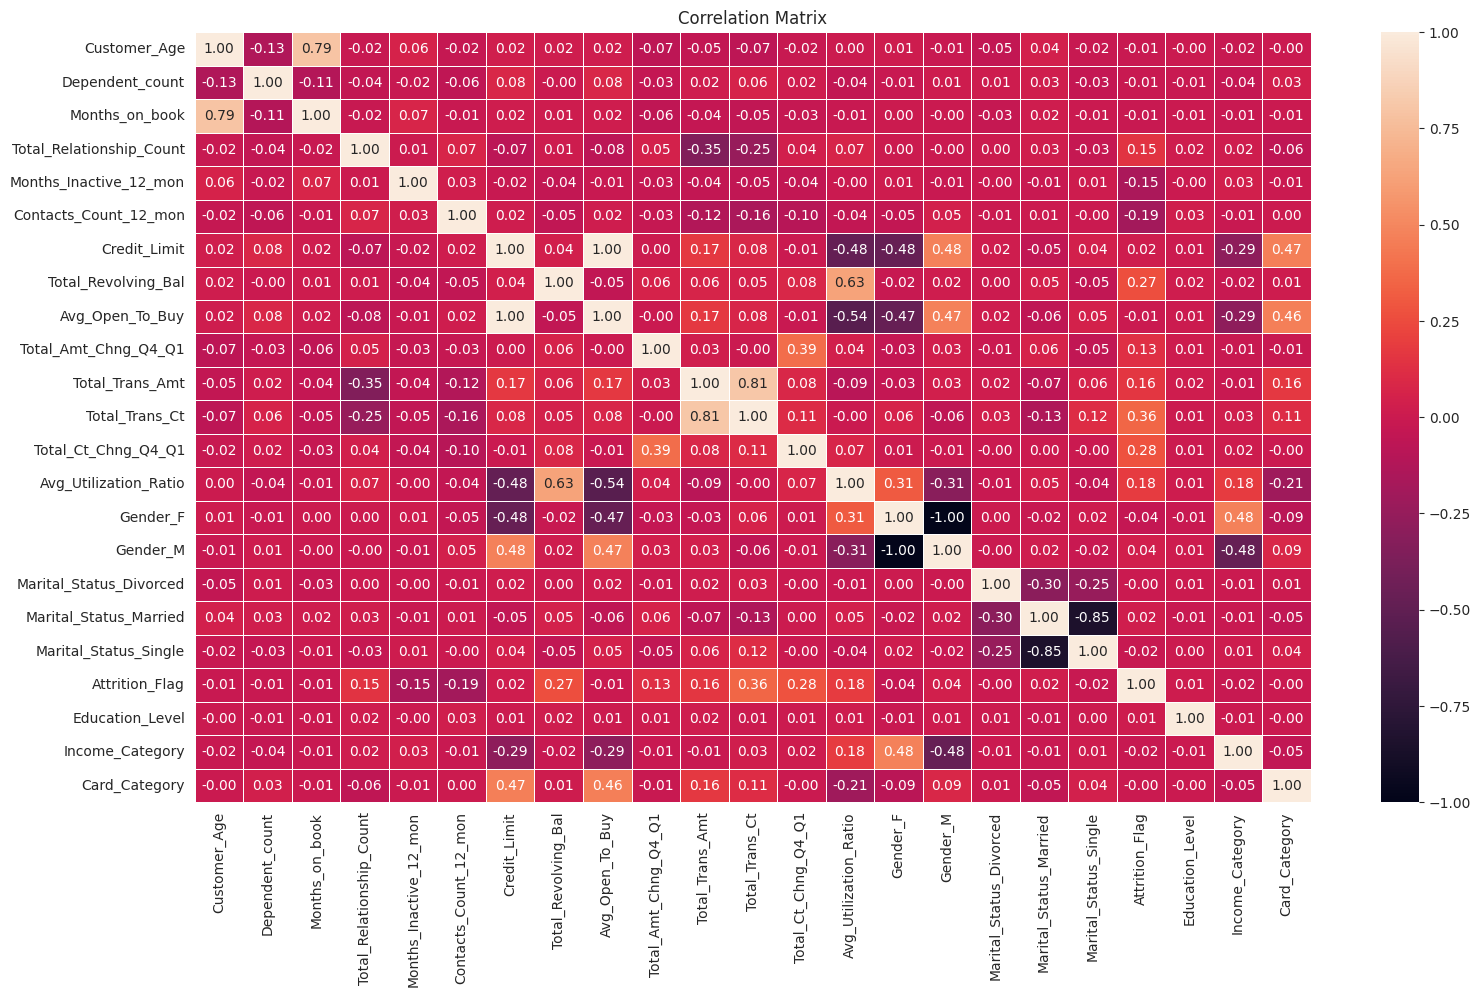

In [16]:
# Feature correlation matrix, enables correlation-based feature selection for modeling
plt.figure(figsize=(18,10))
corr = scaled_df.corr()
sns.heatmap(corr, annot=True, fmt='0.2f', linecolor='white', linewidth=0.5)
plt.title('Correlation Matrix')
plt.show()

In [17]:
# Subset of features to be used for data maodeling and model development
# Dropping features that have less than or equal to +/- 0.01 pearson's correlation coefficient
# with the target variable i.e., Attrition_Flag
features_to_drop = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Education_Level', 'Card_Category', 'Marital_Status_Divorced']
subset_df = scaled_df.drop(features_to_drop, axis=1)
subset_df.head(5)

Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                  0.764487               -1.349309               0.493777   
1                  1.412015               -1.349309              -0.411332   
2                  0.116959               -1.349309              -2.221550   
3                  0.764487               -1.349309              -2.221550   
4                 -0.530569               -1.349309              -0.411332   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0      0.460058            -0.480760         0.502567              2.574433   
1     -0.025947            -0.373652         0.007308              3.497689   
2     -0.556114            -1.437353        -0.427933              8.217051   
3     -0.413874            -1.437353        -0.285773              6.339166   
4     -0.491240             0.097873        -0.499670              2.758188   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0        -0.937167       -0.945214             3.827331   
1        -0.894783       -1.323244            12.579779   
2        -0.722936       -1.869287             6.793694   
3        -1.031741       -1.533260             7.493388   
4        -0.953314       -1.701273             0.563494   

   Avg_Utilization_Ratio  Gender_F  Gender_M  Marital_Status_Married  \
0              -0.794057 -0.954298  0.954298                0.993384   
1              -0.636187  1.047890 -1.047890               -1.006660   
2              -1.012921 -0.954298  0.954298                0.993384   
3              -1.012921 -0.954298  0.954298                0.993384   
4               0.102927 -0.954298  0.954298                0.993384   

   Marital_Status_Single  Attrition_Flag  Income_Category  
0              -0.844561         0.43185        -0.431950  
1               1.184047         0.43185         1.014215  
2              -0.844561         0.43185         0.291133  
3              -0.844561         0.43185        -0.431950  
4              -0.844561         0.43185        -1.155033

# **Dimensionality Reduction**

- Employing PCA to reduce featureset to three features that capture the greatest amount of data variance

In [18]:
# Principal Component Analysis for feature reduction
pca = PCA(n_components=3)
pca_df = pd.DataFrame(pca.fit_transform(subset_df), columns=['dim_1', 'dim_2', 'dim_3'])
pca_df.head()

dim_1     dim_2     dim_3
0  1.394877 -0.665397  2.850175
1 -1.333363  2.360145  2.673222
2  0.368393  0.557545  4.719100
3  0.635245  0.389584  4.592579
4  0.458208 -1.237165  2.593452

# **Clustering**

K-Means Clustering Algoithm
- Identifying appropriate number of clusters
- Clustering datapoints
- Visualizing cluster distribution

In [20]:
# Choosing the appropriate number of clusters
# Method 1 - Elbow Method - Minimize Sum of Squared Errors (SSE)

kmeans_kwargs = {
    'init': 'k-means++',
    'n_init': 10,
    'max_iter': 500,
    'random_state': 42
}

sse = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(pca_df)
  sse.append(kmeans.inertia_)

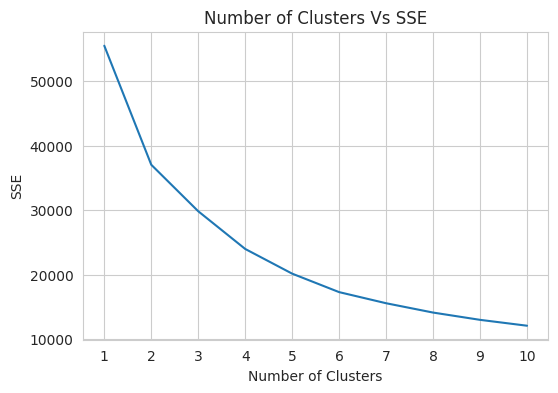

In [21]:
plt.figure(figsize=(6,4))
plt.plot(range(1, 11), sse)
plt.title("Number of Clusters Vs SSE")
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [22]:
# Difficult to identy the elbow by visual inspection
# Employing KneeLocator to identify the elbow point programmatcally

kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
print(f'The elbow point is loacted at: {kl.elbow}')

The elbow point is loacted at: 4


In [23]:
# Method 2 - Silhouette Method - Maximize Silhouette Coefficient (Larger numbers indicate that samples are closer to their clusters than they are to other clusters.)
# Requires at least two clusters to work
silhouette_coefficients = []

for k in range(2,11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(pca_df)
  sscore = silhouette_score(pca_df, kmeans.labels_)
  silhouette_coefficients.append(sscore)

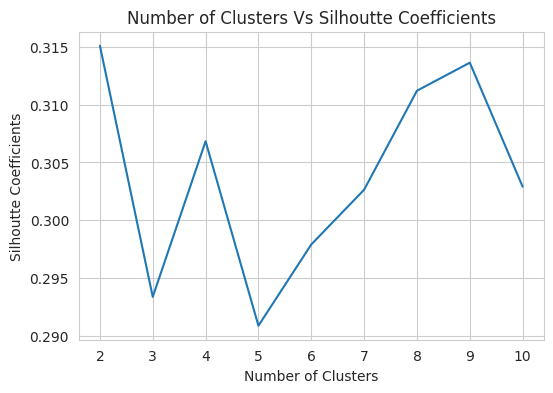

In [24]:
plt.figure(figsize=(6,4))
plt.plot(range(2, 11), silhouette_coefficients)
plt.title("Number of Clusters Vs Silhoutte Coefficients")
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhoutte Coefficients")
plt.show()

In [25]:
# Based on the two methods and my domain knowledge, we can observe that k=4 is the ideal number of clusters,
# given the tradeoff between k and the errors.

# Model fitting
kmeans = KMeans(n_clusters=4, **kmeans_kwargs)
kmeans.fit(pca_df)
pred = kmeans.predict(pca_df)

In [26]:
# Adding the clusters feature to the PCA and original dataframe
pca_df['Clusters'] = pred
pca_df['Clusters'] = pca_df['Clusters'].astype(str)

new_df['Clusters'] = pred
new_df['Clusters'] = new_df['Clusters'].astype(str)

In [27]:
# Plotting the clusters
colors = [
    "#F60000",  # Red
    "#0348FF",  # Blue
    "#E0EF28",  # Yellow
    "#007E2A"   # Green
]

fig = px.scatter_3d(pca_df, x='dim_1', y='dim_2', z='dim_3',
              color='Clusters',color_discrete_sequence=colors, opacity=0.6, symbol = 'Clusters')

# Adjust the size of the data points
fig.update_traces(marker=dict(size=3))

fig.update_layout(title="Plot of Clusters", height=600, width=800)
fig.show()

# **Cluster Analysis**

<Figure size 1500x800 with 0 Axes>

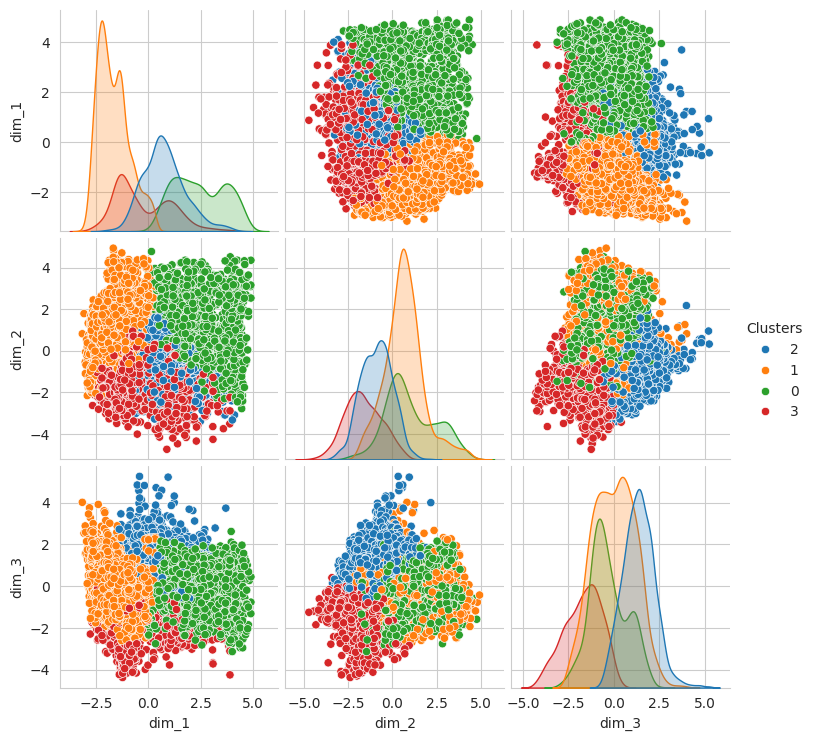

In [28]:
# Pairwise analysis of each dimension with respect to clusters
plt.figure(figsize=(15,8))
sns.pairplot(pca_df,
             vars = ['dim_1',
                     'dim_2', 'dim_3'],
             hue='Clusters')
plt.show()

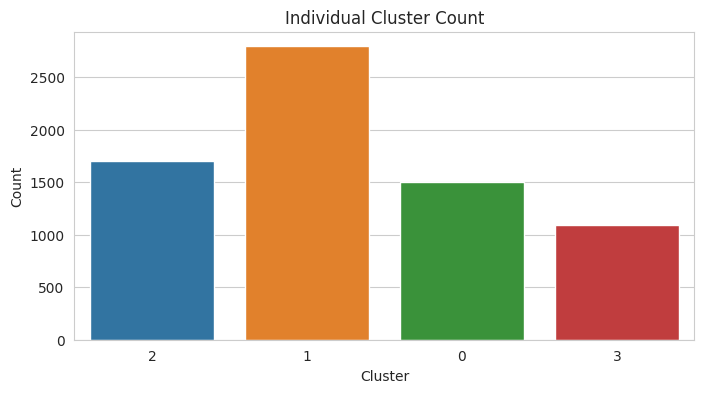

In [47]:
# The distribution of clusters is unequal, with Cluster#1 having the highest representation
plt.figure(figsize=(8,4))
sns.countplot(new_df, x='Clusters', hue='Clusters')
plt.title('Individual Cluster Count')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

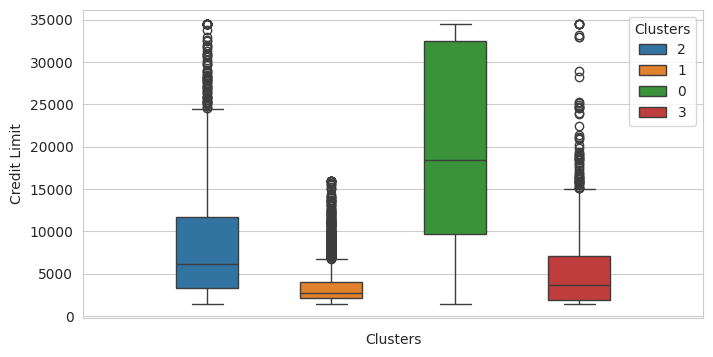

In [49]:
plt.figure(figsize=(8,4))
sns.boxplot(new_df, y='Credit_Limit', hue='Clusters', gap=0.5)
plt.xlabel('Clusters')
plt.ylabel('Credit Limit')
plt.show()

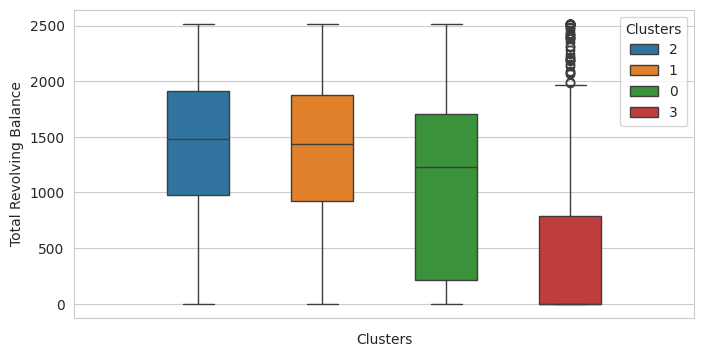

In [50]:
plt.figure(figsize=(8,4))
sns.boxplot(new_df, y='Total_Revolving_Bal', hue='Clusters', gap=0.5)
plt.xlabel('Clusters')
plt.ylabel('Total Revolving Balance')
plt.show()

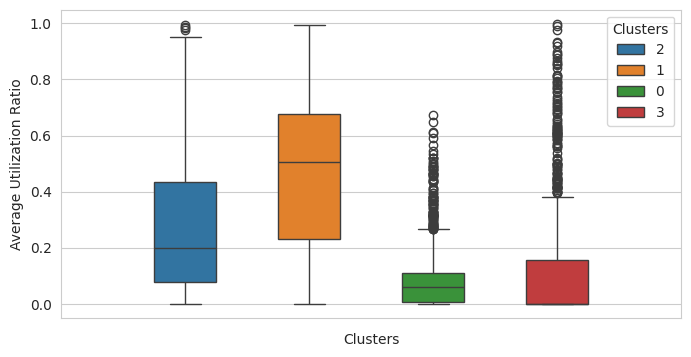

In [51]:
plt.figure(figsize=(8,4))
sns.boxplot(new_df, y='Avg_Utilization_Ratio', hue='Clusters', gap=0.5)
plt.xlabel('Clusters')
plt.ylabel('Average Utilization Ratio')
plt.show()

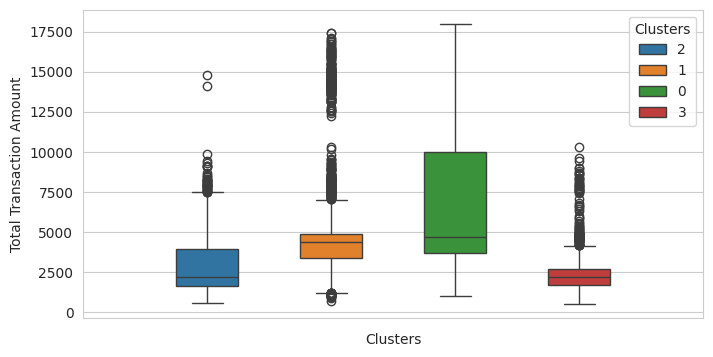

In [52]:
plt.figure(figsize=(8,4))
sns.boxplot(new_df, y='Total_Trans_Amt', hue='Clusters', gap=0.5)
plt.xlabel('Clusters')
plt.ylabel('Total Transaction Amount')
plt.show()

- Cluster 3 has the greatest number of outliers, promting their behavious as high risk.
- Cluster 0 has the lowest credit risk given their low utilization and revolving balance.
- Cluster 1 has the least credit limit but a hist revolving balance and total transaction amount.
-  However, cluster 2 has the least utilization ratio and low transaction amount.

# **Customer Profiling**

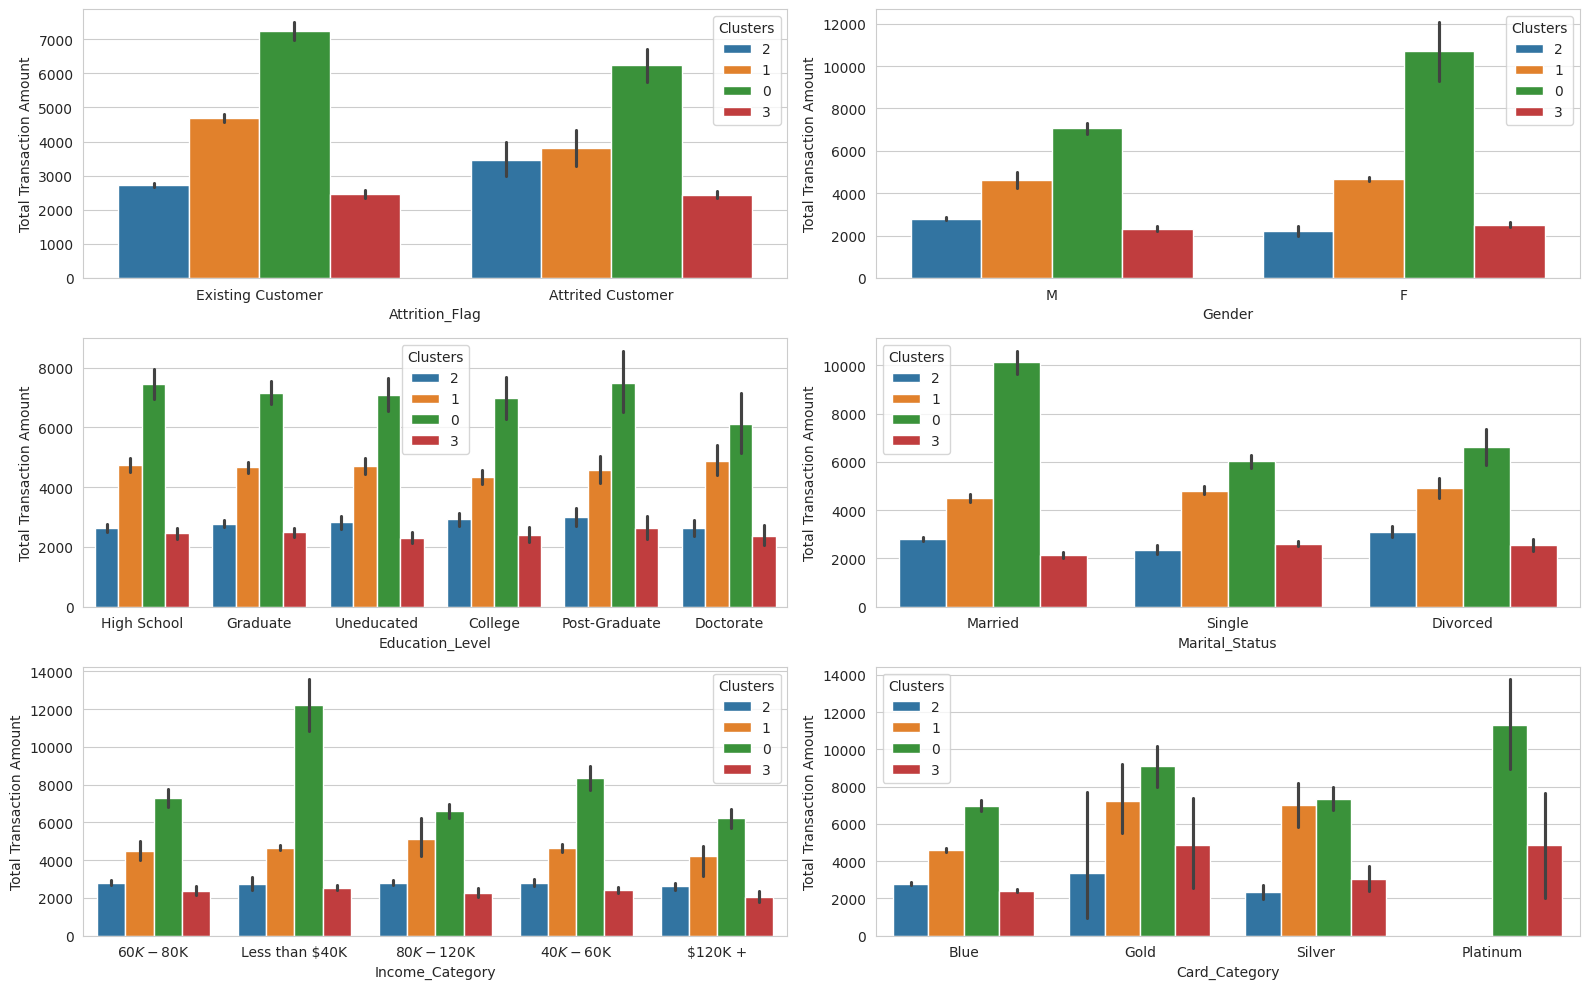

In [40]:
plt.figure(figsize=(16,10))
for i, col in enumerate(categorical_cols):
  plt.subplot(3,2,i+1)
  sns.barplot(new_df, x=col, y='Total_Trans_Amt', hue='Clusters')
  plt.xlabel(f"{col}")
  plt.ylabel('Total Transaction Amount')
plt.tight_layout()
plt.show()

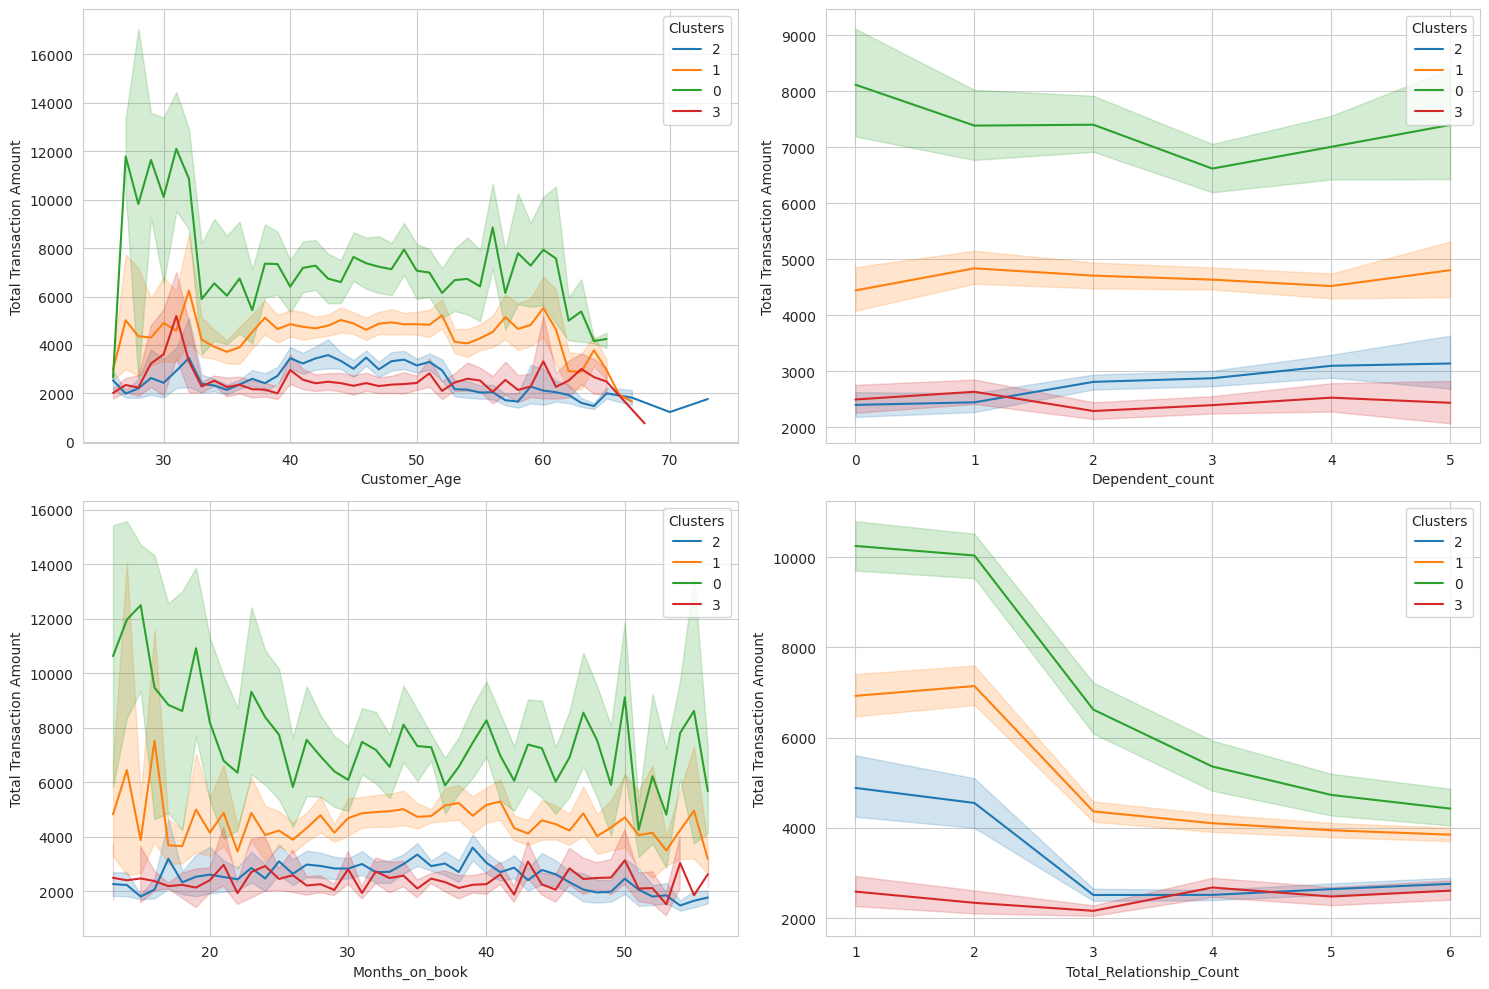

In [37]:
descriptive_cols = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count']
plt.figure(figsize=(15,10))
for i, col in enumerate(descriptive_cols):
  plt.subplot(2,2,i+1)
  sns.lineplot(new_df,
               x= col,
               y='Total_Trans_Amt', hue='Clusters')
  plt.xlabel(f"{col}")
  plt.ylabel('Total Transaction Amount')
plt.tight_layout()
plt.show()

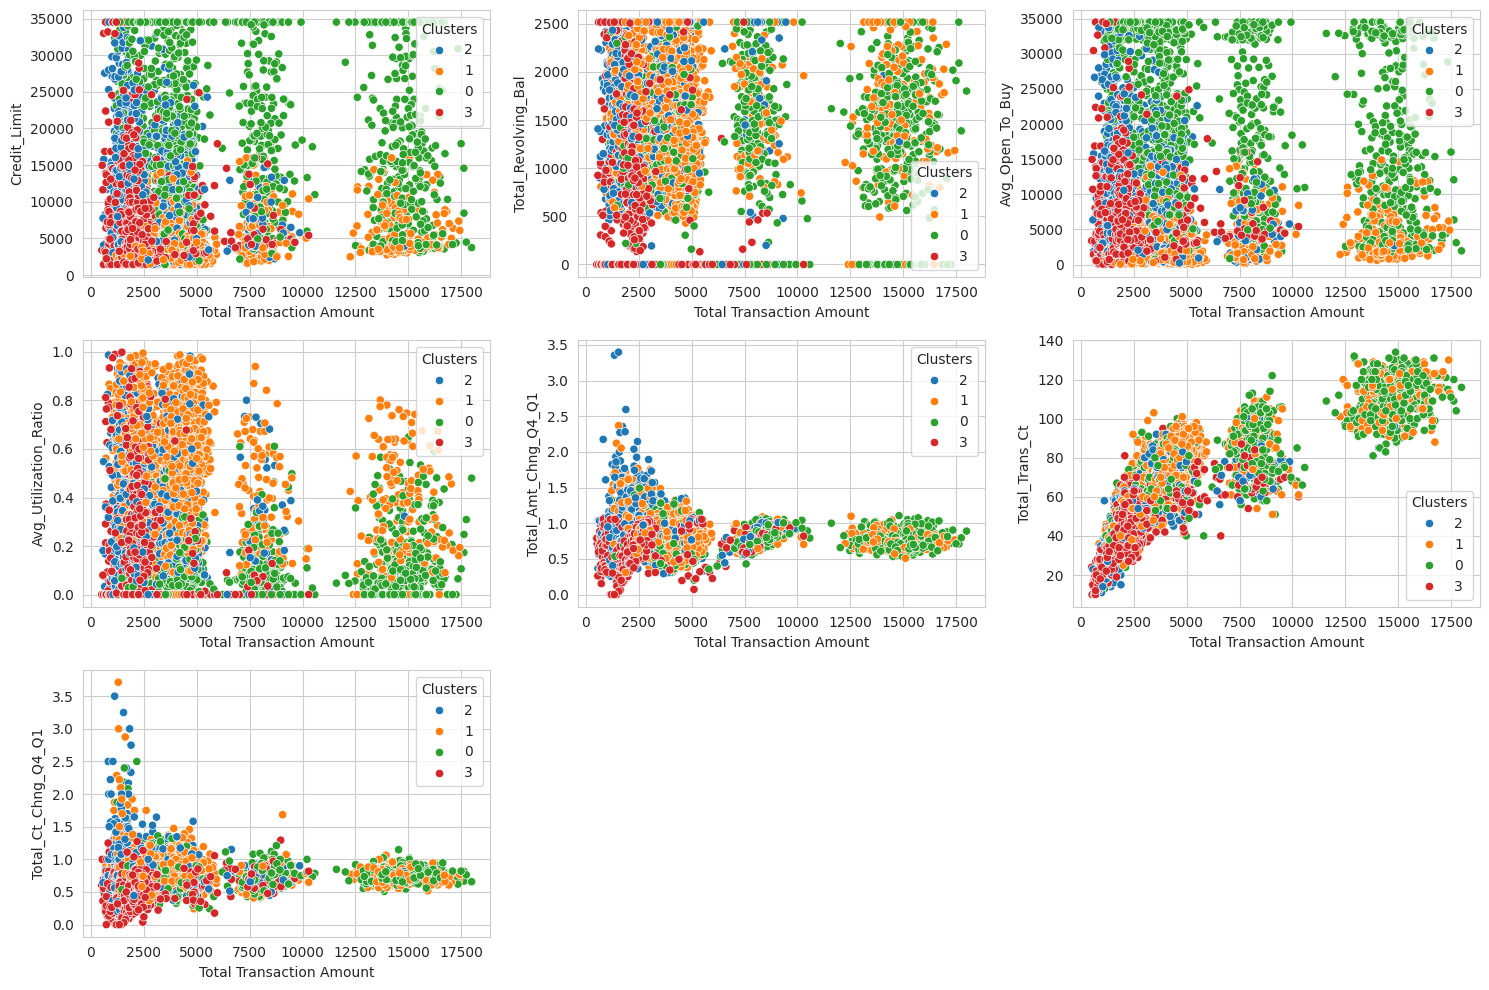

In [46]:
num_cols = ['Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Avg_Utilization_Ratio', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']
plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols):
  plt.subplot(3,3,i+1)
  sns.scatterplot(new_df,
               x= 'Total_Trans_Amt' ,
               y=col, hue='Clusters')
  plt.ylabel(f"{col}")
  plt.xlabel('Total Transaction Amount')
plt.tight_layout()
plt.show()

**Cluster 0**
- Customers likely to remain with the credit card provider
- Has a greater number of married female customers
- Majority of the customers earn less than 40K and have platinum credit cards
- Women between 25 - 35 years spend more and have been on the books longer
- Customers have high number of transactions with large amounts i.e., >12K

**Cluster 1**
- Customers likely to remain with the credit card provider
- Has a greater number of male customers (single or otherwise)
- Majority of the customers between 80K - 120k and have either gold or silver credit cards
- Younger customers spend more and have been on the books longer
- Most customers have less than 5K total transaction amount with varying levels of outsanding balance.

**Cluster 2**
- Customers likely to churn
- Has a greater number of male customers (married or divorced)
- All customers earn varying amounts ranging from 40K - 120K+ and have mostly gold credit cards
- Middle aged (40-50) customers predominantly spend more and have been on the books longer
- Most customers have between 2-4K total transaction amount with varying levels of outsanding balance.
- Most have high spending ability with their credit cards

**Cluster 3**
- Customers either churn or remain with the credit card provider
- Approximately equal number of male and female customers
- All customers earn varying amounts ranging from 40K - 120K+ and have either gold or platimum credit cards
- Old aged (50-60) customers predominantly spend more but have low transaction amounts i.e., less than 3K.


# **End of File**